### Setup 

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Statistical Tests
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from scipy.stats import norm

np.set_printoptions(suppress=True)


# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as dates
import seaborn as sns
from sklearn.model_selection import learning_curve
import datetime

pd.options.display.float_format = '{:20,.2f}'.format



In [2]:
import env

import wrangle

from wrangle import clean_zillow, missing_zero_values_table, features_missing, handle_missing_values, get_zillow_data, split, seperate_y, scale_data, split_seperate_scale 

import explore

### Acquisition 

In [3]:
df = pd.read_csv('zillowcluster_df.csv') 

In [4]:
df.head()

,Unnamed: 0,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc
0,0,nan,nan,2.00,nan,nan,nan,10711855,1087254,nan,...,nan,"60,371,132,321,007.00",-0.01,2017-07-07,NaN,NaN,NaN,Central,NaN,NaN
1,1,nan,nan,2.00,nan,nan,1.00,10711877,1072280,nan,...,nan,"60,371,132,321,007.00",0.02,2017-08-29,Central,NaN,NaN,Central,NaN,NaN
2,2,nan,nan,2.00,nan,nan,1.00,10711888,1340933,nan,...,nan,"60,371,132,321,007.00",0.08,2017-04-04,Central,NaN,NaN,Central,NaN,NaN
3,3,nan,nan,2.00,nan,nan,nan,10711910,1878109,nan,...,nan,"60,371,132,321,008.00",-0.04,2017-03-17,NaN,NaN,NaN,Central,NaN,NaN
4,4,nan,nan,2.00,nan,nan,nan,10711923,2190858,nan,...,nan,"60,371,132,321,008.00",-0.01,2017-03-24,NaN,NaN,NaN,Central,NaN,NaN


In [5]:
df.shape

(77413, 68)

In [6]:
clean_df = clean_zillow(df)

In [7]:
clean_df.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2.00,5.00,2.00,3.00,"2,107.00",6037,34.22,-118.62,"9,158.00",1.00,...,0.33,0.00,1.23,0.21,0.30,0.50,0.67,1,0,0
10711877,2.00,1.00,2.00,4.00,"1,882.00",6037,34.22,-118.62,"9,035.00",1.00,...,0.33,0.00,1.23,0.21,0.30,0.40,0.50,1,0,0
10711888,2.00,1.00,2.00,4.00,"1,882.00",6037,34.22,-118.62,"9,800.00",0.00,...,0.33,0.00,1.23,0.22,0.30,0.40,0.50,1,0,0
10711910,2.00,5.00,2.00,3.00,"1,477.00",6037,34.22,-118.62,"11,285.00",1.00,...,0.47,0.00,1.43,0.26,0.30,0.30,0.67,1,0,0
10711923,2.00,5.00,2.00,4.00,"1,918.00",6037,34.22,-118.62,"11,239.00",1.00,...,0.47,0.00,1.26,0.26,0.30,0.40,0.50,1,0,0


In [8]:
clean_df.shape

(59959, 30)

In [9]:
train, validate, test = split(clean_df)

In [10]:
train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
17054354,1.00,5.00,2.00,4.00,"1,311.00",6111,34.44,-119.30,"9,552.00",0.00,...,0.40,0.00,2.30,0.22,0.30,0.30,0.50,0,0,1
12539496,2.00,1.00,2.00,2.00,"1,111.00",6037,33.77,-118.15,"18,703.00",1.00,...,0.27,0.00,1.19,0.43,0.30,0.20,1.00,1,0,0
14720441,1.00,5.00,2.50,3.00,"1,689.00",6059,33.61,-117.62,"3,150.00",0.00,...,0.27,0.00,1.26,0.07,0.00,0.40,0.83,0,1,0
11291732,2.00,1.00,2.00,4.00,"1,329.00",6037,34.68,-118.12,"6,335.00",0.00,...,0.33,0.00,1.87,0.15,0.10,0.30,0.50,1,0,0
14320729,1.00,13.00,2.00,4.00,"2,175.00",6059,33.63,-117.81,"6,240.00",0.00,...,0.33,0.00,1.04,0.14,0.10,0.50,0.50,0,1,0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33576 entries, 17054354 to 13884593
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   heatingorsystemtypeid         33576 non-null  float64       
 1   airconditioningtypeid         33576 non-null  float64       
 2   bathroomcnt                   33576 non-null  float64       
 3   bedroomcnt                    33576 non-null  float64       
 4   calculatedfinishedsquarefeet  33576 non-null  float64       
 5   fips                          33576 non-null  object        
 6   latitude                      33576 non-null  float64       
 7   longitude                     33576 non-null  float64       
 8   lotsizesquarefeet             33576 non-null  float64       
 9   poolcnt                       33576 non-null  float64       
 10  roomcnt                       33576 non-null  float64       
 11  yearbuilt         

In [12]:
train.describe()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county
count,"33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00",...,"33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00"
mean,2.97,4.20,2.22,3.06,"1,707.34",33.99,-118.18,"8,175.48",0.18,1.74,...,0.38,0.00,1.28,0.19,0.17,0.36,0.76,0.59,0.32,0.09
std,3.40,2.23,0.83,0.95,728.41,0.27,0.37,"5,264.44",0.38,2.97,...,0.15,0.00,0.22,0.12,0.10,0.18,0.27,0.49,0.46,0.29
min,1.00,1.00,1.00,1.00,360.00,33.34,-119.48,236.00,0.00,0.00,...,0.00,0.00,0.23,0.01,0.00,0.00,0.20,0.00,0.00,0.00
25%,1.00,1.00,2.00,2.00,"1,197.00",33.79,-118.40,"5,736.00",0.00,0.00,...,0.27,0.00,1.16,0.13,0.10,0.20,0.50,0.00,0.00,0.00
50%,2.00,5.00,2.00,3.00,"1,535.00",33.99,-118.14,"7,230.50",0.00,0.00,...,0.40,0.00,1.22,0.17,0.20,0.40,0.67,1.00,0.00,0.00
75%,2.00,5.00,3.00,4.00,"2,049.00",34.17,-117.90,"8,269.00",0.00,4.00,...,0.47,0.00,1.34,0.19,0.20,0.50,1.00,1.00,1.00,0.00
max,24.00,13.00,10.00,10.00,"4,996.00",34.72,-117.55,"36,778.00",1.00,12.00,...,0.93,0.00,2.30,0.84,0.40,0.80,3.00,1.00,1.00,1.00


In [13]:
train.shape

(33576, 30)

In [14]:
validate.shape

(14391, 30)

In [15]:
test.shape

(11992, 30)

In [16]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)

In [17]:
train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_of_home,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
0,0.00,0.33,0.11,0.33,0.21,0.80,0.09,0.25,0.00,0.58,...,0.41,0.43,0.41,1.00,0.25,0.75,0.38,0.00,0.00,1.00
1,0.04,0.00,0.11,0.11,0.16,0.31,0.69,0.51,1.00,0.00,...,0.26,0.29,0.48,0.46,0.51,0.75,0.25,1.00,0.00,0.00
2,0.00,0.33,0.17,0.22,0.29,0.20,0.97,0.08,0.00,0.00,...,0.19,0.29,0.40,0.50,0.07,0.00,0.50,0.00,1.00,0.00
3,0.04,0.00,0.11,0.33,0.21,0.97,0.70,0.17,0.00,0.00,...,0.33,0.36,0.40,0.79,0.17,0.25,0.38,1.00,0.00,0.00
4,0.00,1.00,0.11,0.33,0.39,0.21,0.87,0.16,0.00,0.67,...,0.29,0.36,0.25,0.39,0.16,0.25,0.62,0.00,1.00,0.00


In [18]:
train_scaled.describe()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_of_home,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
count,"33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00",...,"33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00"
mean,0.09,0.27,0.14,0.23,0.29,0.47,0.67,0.22,0.18,0.15,...,0.35,0.41,0.36,0.51,0.21,0.43,0.44,0.59,0.32,0.09
std,0.15,0.19,0.09,0.11,0.16,0.19,0.19,0.14,0.38,0.25,...,0.17,0.16,0.10,0.11,0.15,0.25,0.22,0.49,0.46,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.11,0.11,0.18,0.33,0.56,0.15,0.00,0.00,...,0.22,0.29,0.29,0.45,0.14,0.25,0.25,0.00,0.00,0.00
50%,0.04,0.33,0.11,0.22,0.25,0.47,0.70,0.19,0.00,0.00,...,0.36,0.43,0.35,0.48,0.19,0.50,0.50,1.00,0.00,0.00
75%,0.04,0.33,0.22,0.33,0.36,0.60,0.82,0.22,0.00,0.33,...,0.47,0.50,0.42,0.54,0.22,0.50,0.62,1.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Modeling

In [19]:
## latitude

## sq footage
### calculatedsquarefeet

## age of home 

## tax rate 

### different model for each county?

In [20]:
list(train_scaled.columns)

['heatingorsystemtypeid',
 'airconditioningtypeid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'roomcnt',
 'fireplaceflag',
 'taxvaluedollarcnt',
 'taxamount',
 'logerror',
 'age_of_home',
 'age_bin',
 'baths_per_sqft',
 'taxrate',
 'acres',
 'acres_bin',
 'sqft_bin',
 'la_county',
 'orange_county',
 'ventura_county']

In [21]:
X = train_scaled[['latitude', 'calculatedfinishedsquarefeet', 'age_of_home', 'taxrate']]

In [22]:
X.head()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
0,0.80,0.21,0.41,1.00
1,0.31,0.16,0.26,0.46
2,0.20,0.29,0.19,0.50
3,0.97,0.21,0.33,0.79
4,0.21,0.39,0.29,0.39


In [23]:
X.corr()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
latitude,1.00,0.04,0.04,0.33
calculatedfinishedsquarefeet,0.04,1.00,-0.31,-0.08
age_of_home,0.04,-0.31,1.00,0.06
taxrate,0.33,-0.08,0.06,1.00


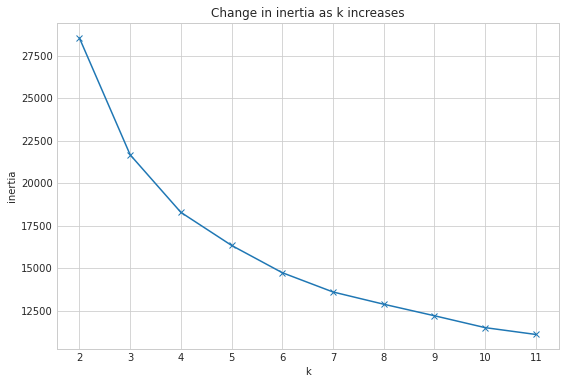

In [24]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [25]:
## it looks like the most appropriate k would be 4

In [26]:
kmeans = KMeans(n_clusters=4)
## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)
## fit the model to the fields you want to use in your model

kmeans.predict(X)
## make your predictions

train_scaled['cluster'] = kmeans.predict(X)
## store the predictions as a column on your df

train['cluster'] = kmeans.predict(X)
## store the predictions as a column on your df

In [27]:
train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county,cluster
0,0.00,0.33,0.11,0.33,0.21,0.80,0.09,0.25,0.00,0.58,...,0.43,0.41,1.00,0.25,0.75,0.38,0.00,0.00,1.00,1
1,0.04,0.00,0.11,0.11,0.16,0.31,0.69,0.51,1.00,0.00,...,0.29,0.48,0.46,0.51,0.75,0.25,1.00,0.00,0.00,0
2,0.00,0.33,0.17,0.22,0.29,0.20,0.97,0.08,0.00,0.00,...,0.29,0.40,0.50,0.07,0.00,0.50,0.00,1.00,0.00,0
3,0.04,0.00,0.11,0.33,0.21,0.97,0.70,0.17,0.00,0.00,...,0.36,0.40,0.79,0.17,0.25,0.38,1.00,0.00,0.00,1
4,0.00,1.00,0.11,0.33,0.39,0.21,0.87,0.16,0.00,0.67,...,0.36,0.25,0.39,0.16,0.25,0.62,0.00,1.00,0.00,0


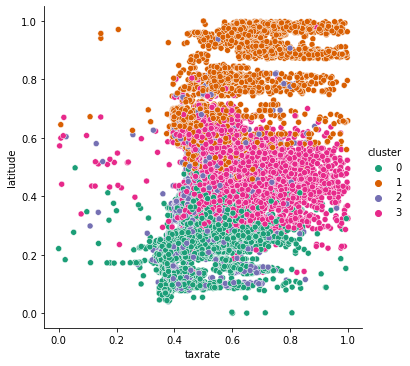

In [28]:
sns.relplot(data=train_scaled, x='taxrate', y='latitude', hue='cluster', palette= 'Dark2')

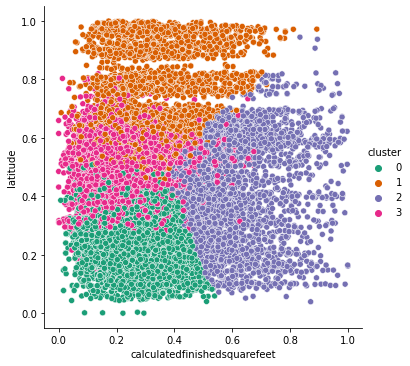

In [29]:
sns.relplot(data=train_scaled, x='calculatedfinishedsquarefeet', y='latitude', hue='cluster', palette= 'Dark2')

(-0.3, 0.3)

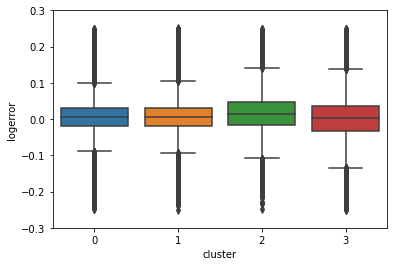

In [30]:
sns.boxplot(y=train.logerror, x=train.cluster)
plt.ylim(-.3, .3)

In [31]:
## save clusters to csv to be explored

In [32]:
model1 = train

In [33]:
model1.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
17054354,1.00,5.00,2.00,4.00,"1,311.00",6111,34.44,-119.30,"9,552.00",0.00,...,0.00,2.30,0.22,0.30,0.30,0.50,0,0,1,1
12539496,2.00,1.00,2.00,2.00,"1,111.00",6037,33.77,-118.15,"18,703.00",1.00,...,0.00,1.19,0.43,0.30,0.20,1.00,1,0,0,0
14720441,1.00,5.00,2.50,3.00,"1,689.00",6059,33.61,-117.62,"3,150.00",0.00,...,0.00,1.26,0.07,0.00,0.40,0.83,0,1,0,0
11291732,2.00,1.00,2.00,4.00,"1,329.00",6037,34.68,-118.12,"6,335.00",0.00,...,0.00,1.87,0.15,0.10,0.30,0.50,1,0,0,1
14320729,1.00,13.00,2.00,4.00,"2,175.00",6059,33.63,-117.81,"6,240.00",0.00,...,0.00,1.04,0.14,0.10,0.50,0.50,0,1,0,0


In [34]:
model1['cluster'] = kmeans.predict(X)

In [35]:
model1.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
17054354,1.00,5.00,2.00,4.00,"1,311.00",6111,34.44,-119.30,"9,552.00",0.00,...,0.00,2.30,0.22,0.30,0.30,0.50,0,0,1,1
12539496,2.00,1.00,2.00,2.00,"1,111.00",6037,33.77,-118.15,"18,703.00",1.00,...,0.00,1.19,0.43,0.30,0.20,1.00,1,0,0,0
14720441,1.00,5.00,2.50,3.00,"1,689.00",6059,33.61,-117.62,"3,150.00",0.00,...,0.00,1.26,0.07,0.00,0.40,0.83,0,1,0,0
11291732,2.00,1.00,2.00,4.00,"1,329.00",6037,34.68,-118.12,"6,335.00",0.00,...,0.00,1.87,0.15,0.10,0.30,0.50,1,0,0,1
14320729,1.00,13.00,2.00,4.00,"2,175.00",6059,33.63,-117.81,"6,240.00",0.00,...,0.00,1.04,0.14,0.10,0.50,0.50,0,1,0,0


In [36]:
model1.groupby('fips').cluster.value_counts()

fips  cluster
6037  3          11310
      1           5191
      2           1770
      0           1615
6059  0           7538
      2           1796
      3           1265
6111  1           2297
      3            427
      2            367
Name: cluster, dtype: int64

In [37]:
model1.to_csv('model1.csv')

## LA County

In [38]:
la_train = train[train['la_county'] == 1]

## make a dataframe that is only LA County homes

In [39]:
la_train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
12539496,2.00,1.00,2.00,2.00,"1,111.00",6037,33.77,-118.15,"18,703.00",1.00,...,0.00,1.19,0.43,0.30,0.20,1.00,1,0,0,0
11291732,2.00,1.00,2.00,4.00,"1,329.00",6037,34.68,-118.12,"6,335.00",0.00,...,0.00,1.87,0.15,0.10,0.30,0.50,1,0,0,1
12017984,2.00,1.00,1.00,1.00,681.00,6037,34.09,-118.37,"30,249.00",0.00,...,0.00,1.26,0.69,0.40,0.00,1.00,1,0,0,3
13041815,2.00,5.00,2.00,3.00,"1,325.00",6037,34.13,-117.84,"11,044.00",1.00,...,0.00,1.62,0.25,0.30,0.30,0.67,1,0,0,3
10853982,2.00,1.00,3.00,4.00,"2,729.00",6037,34.16,-118.49,"10,237.00",1.00,...,0.00,1.22,0.24,0.30,0.60,0.75,1,0,0,2


In [40]:
la_train.groupby('la_county').la_county.value_counts()

la_county  la_county
1          1            19886
Name: la_county, dtype: int64

In [41]:
la_train.shape

(19886, 31)

In [42]:
la_train = la_train.drop(columns = 'cluster')

In [43]:
la_train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
12539496,2.00,1.00,2.00,2.00,"1,111.00",6037,33.77,-118.15,"18,703.00",1.00,...,0.27,0.00,1.19,0.43,0.30,0.20,1.00,1,0,0
11291732,2.00,1.00,2.00,4.00,"1,329.00",6037,34.68,-118.12,"6,335.00",0.00,...,0.33,0.00,1.87,0.15,0.10,0.30,0.50,1,0,0
12017984,2.00,1.00,1.00,1.00,681.00,6037,34.09,-118.37,"30,249.00",0.00,...,0.33,0.00,1.26,0.69,0.40,0.00,1.00,1,0,0
13041815,2.00,5.00,2.00,3.00,"1,325.00",6037,34.13,-117.84,"11,044.00",1.00,...,0.47,0.00,1.62,0.25,0.30,0.30,0.67,1,0,0
10853982,2.00,1.00,3.00,4.00,"2,729.00",6037,34.16,-118.49,"10,237.00",1.00,...,0.47,0.00,1.22,0.24,0.30,0.60,0.75,1,0,0


In [44]:
la_train_scaled = train_scaled[train_scaled['la_county'] == 1]

In [45]:
la_train_scaled.groupby('la_county').la_county.value_counts()

la_county  la_county
1.00       1.00         19886
Name: la_county, dtype: int64

In [46]:
la_train_scaled.shape

(19886, 25)

In [47]:
la_train_scaled = la_train_scaled.drop(columns = 'cluster')

In [48]:
la_train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_of_home,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
1,0.04,0.00,0.11,0.11,0.16,0.31,0.69,0.51,1.00,0.00,...,0.26,0.29,0.48,0.46,0.51,0.75,0.25,1.00,0.00,0.00
3,0.04,0.00,0.11,0.33,0.21,0.97,0.70,0.17,0.00,0.00,...,0.33,0.36,0.40,0.79,0.17,0.25,0.38,1.00,0.00,0.00
5,0.04,0.00,0.00,0.00,0.07,0.55,0.58,0.82,0.00,0.00,...,0.33,0.36,0.39,0.50,0.82,1.00,0.00,1.00,0.00,0.00
8,0.04,0.33,0.11,0.22,0.21,0.57,0.85,0.30,1.00,0.00,...,0.46,0.50,0.40,0.67,0.29,0.75,0.38,1.00,0.00,0.00
9,0.04,0.00,0.22,0.33,0.51,0.60,0.52,0.27,1.00,0.00,...,0.49,0.50,0.29,0.48,0.28,0.75,0.75,1.00,0.00,0.00


### LA Model

In [49]:
## Using the same features from our main model, we will make another model exclusive to homes in LA County

In [50]:
X = la_train_scaled[['latitude', 'calculatedfinishedsquarefeet', 'age_of_home', 'taxrate']]

In [51]:
X.head()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
1,0.31,0.16,0.26,0.46
3,0.97,0.21,0.33,0.79
5,0.55,0.07,0.33,0.50
8,0.57,0.21,0.46,0.67
9,0.60,0.51,0.49,0.48


In [52]:
X.corr()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
latitude,1.00,0.19,-0.33,0.33
calculatedfinishedsquarefeet,0.19,1.00,-0.31,-0.06
age_of_home,-0.33,-0.31,1.00,-0.09
taxrate,0.33,-0.06,-0.09,1.00


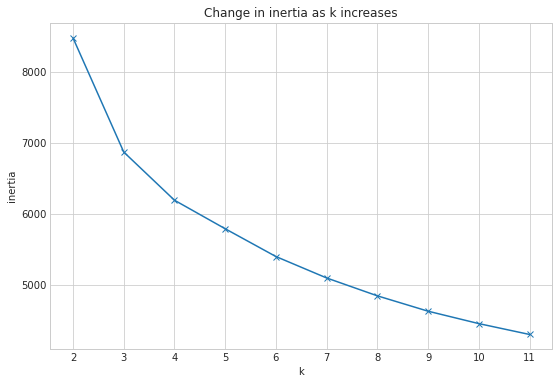

In [53]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(la_train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [54]:
## It appears as though 4 would be the most appropriate k

In [55]:
kmeans = KMeans(n_clusters=4)
## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)
## fit the model to the fields you want to use in your model

kmeans.predict(X)
## make your predictions

la_train_scaled['cluster'] = kmeans.predict(X)
## store the predictions as a column on your df

la_train['cluster'] = kmeans.predict(X)
## store the predictions as a column on your df

In [56]:
la_train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county,cluster
1,0.04,0.00,0.11,0.11,0.16,0.31,0.69,0.51,1.00,0.00,...,0.29,0.48,0.46,0.51,0.75,0.25,1.00,0.00,0.00,0
3,0.04,0.00,0.11,0.33,0.21,0.97,0.70,0.17,0.00,0.00,...,0.36,0.40,0.79,0.17,0.25,0.38,1.00,0.00,0.00,3
5,0.04,0.00,0.00,0.00,0.07,0.55,0.58,0.82,0.00,0.00,...,0.36,0.39,0.50,0.82,1.00,0.00,1.00,0.00,0.00,0
8,0.04,0.33,0.11,0.22,0.21,0.57,0.85,0.30,1.00,0.00,...,0.50,0.40,0.67,0.29,0.75,0.38,1.00,0.00,0.00,1
9,0.04,0.00,0.22,0.33,0.51,0.60,0.52,0.27,1.00,0.00,...,0.50,0.29,0.48,0.28,0.75,0.75,1.00,0.00,0.00,2


In [57]:
la_train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
12539496,2.00,1.00,2.00,2.00,"1,111.00",6037,33.77,-118.15,"18,703.00",1.00,...,0.00,1.19,0.43,0.30,0.20,1.00,1,0,0,0
11291732,2.00,1.00,2.00,4.00,"1,329.00",6037,34.68,-118.12,"6,335.00",0.00,...,0.00,1.87,0.15,0.10,0.30,0.50,1,0,0,3
12017984,2.00,1.00,1.00,1.00,681.00,6037,34.09,-118.37,"30,249.00",0.00,...,0.00,1.26,0.69,0.40,0.00,1.00,1,0,0,0
13041815,2.00,5.00,2.00,3.00,"1,325.00",6037,34.13,-117.84,"11,044.00",1.00,...,0.00,1.62,0.25,0.30,0.30,0.67,1,0,0,1
10853982,2.00,1.00,3.00,4.00,"2,729.00",6037,34.16,-118.49,"10,237.00",1.00,...,0.00,1.22,0.24,0.30,0.60,0.75,1,0,0,2


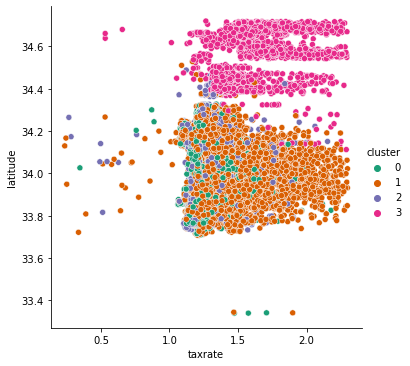

In [58]:
sns.relplot(data=la_train, x='taxrate', y='latitude', hue='cluster', palette= 'Dark2')

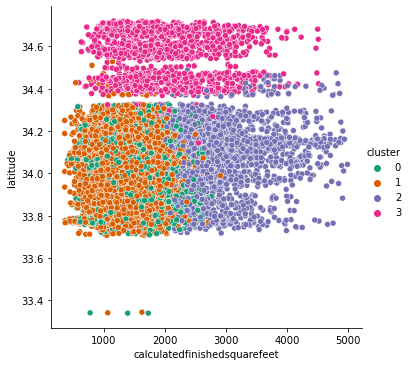

In [59]:
sns.relplot(data=la_train, x='calculatedfinishedsquarefeet', y='latitude', hue='cluster', palette= 'Dark2')

(-0.3, 0.3)

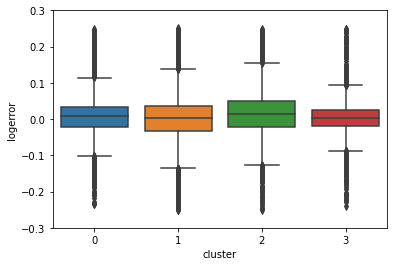

In [60]:
sns.boxplot(y=la_train.logerror, x=la_train.cluster)
plt.ylim(-.3, .3)

In [61]:
la_train.groupby('fips').cluster.value_counts()

fips  cluster
6037  1          10771
      0           3916
      2           2822
      3           2377
Name: cluster, dtype: int64

In [62]:
la_train.to_csv('la_model.csv')

## Orange County

In [63]:
orange_train = train[train['orange_county'] == 1]

## make a dataframe that is only Orange County homes

In [64]:
orange_train.groupby('orange_county').orange_county.value_counts()

orange_county  orange_county
1              1                10599
Name: orange_county, dtype: int64

In [65]:
orange_train = orange_train.drop(columns = 'cluster')

In [66]:
orange_train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
14720441,1.00,5.00,2.50,3.00,"1,689.00",6059,33.61,-117.62,"3,150.00",0.00,...,0.27,0.00,1.26,0.07,0.00,0.40,0.83,0,1,0
14320729,1.00,13.00,2.00,4.00,"2,175.00",6059,33.63,-117.81,"6,240.00",0.00,...,0.33,0.00,1.04,0.14,0.10,0.50,0.50,0,1,0
14482723,1.00,5.00,4.50,5.00,"3,356.00",6059,33.62,-117.57,"7,500.00",1.00,...,0.20,0.00,1.01,0.17,0.20,0.70,0.90,0,1,0
14501969,1.00,5.00,2.50,3.00,"1,851.00",6059,33.65,-117.62,"5,780.00",0.00,...,0.20,0.00,1.45,0.13,0.10,0.40,0.83,0,1,0
14170684,1.00,5.00,2.00,3.00,"1,390.00",6059,33.90,-117.85,"7,904.00",1.00,...,0.33,0.00,1.28,0.18,0.20,0.30,0.67,0,1,0


In [67]:
orange_train.shape

(10599, 30)

In [68]:
orange_train_scaled = train_scaled[train_scaled['orange_county'] == 1]

In [69]:
orange_train_scaled.groupby('orange_county').orange_county.value_counts()

orange_county  orange_county
1.00           1.00             10599
Name: orange_county, dtype: int64

In [70]:
orange_train_scaled = orange_train_scaled.drop(columns = 'cluster')

In [71]:
orange_train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_of_home,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
2,0.00,0.33,0.17,0.22,0.29,0.20,0.97,0.08,0.00,0.00,...,0.19,0.29,0.40,0.50,0.07,0.00,0.50,0.00,1.00,0.00
4,0.00,1.00,0.11,0.33,0.39,0.21,0.87,0.16,0.00,0.67,...,0.29,0.36,0.25,0.39,0.16,0.25,0.62,0.00,1.00,0.00
7,0.00,0.33,0.39,0.44,0.65,0.21,0.99,0.20,1.00,0.00,...,0.16,0.21,0.36,0.38,0.19,0.50,0.88,0.00,1.00,0.00
13,0.00,0.33,0.17,0.22,0.32,0.23,0.97,0.15,0.00,0.00,...,0.16,0.21,0.36,0.59,0.14,0.25,0.50,0.00,1.00,0.00
17,0.00,0.33,0.11,0.22,0.22,0.41,0.85,0.21,1.00,0.50,...,0.33,0.36,0.39,0.51,0.20,0.50,0.38,0.00,1.00,0.00


In [72]:
orange_train_scaled.shape

(10599, 24)

### Orange Model

In [73]:
## Using the same features from our main model, we will make another model exclusive to homes in Orange County

In [74]:
X = orange_train_scaled[['latitude', 'calculatedfinishedsquarefeet', 'age_of_home', 'taxrate']]

In [75]:
X.head()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
2,0.20,0.29,0.19,0.50
4,0.21,0.39,0.29,0.39
7,0.21,0.65,0.16,0.38
13,0.23,0.32,0.16,0.59
17,0.41,0.22,0.33,0.51


In [76]:
X.corr()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
latitude,1.00,-0.07,0.29,0.23
calculatedfinishedsquarefeet,-0.07,1.00,-0.28,-0.08
age_of_home,0.29,-0.28,1.00,0.05
taxrate,0.23,-0.08,0.05,1.00


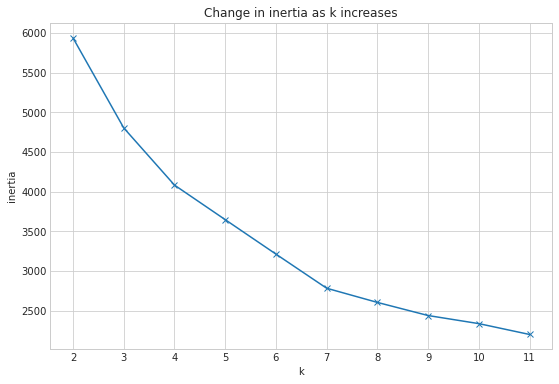

In [77]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(orange_train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [78]:
## It appears as though the most appropriate k would be 4

In [79]:
kmeans = KMeans(n_clusters=4)
## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)
## fit the model to the fields you want to use in your model

kmeans.predict(X)
## make your predictions

orange_train_scaled['cluster'] = kmeans.predict(X)
## store the predictions as a column on your df

orange_train['cluster'] = kmeans.predict(X)
## store the predictions as a column on your df

In [80]:
orange_train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county,cluster
2,0.00,0.33,0.17,0.22,0.29,0.20,0.97,0.08,0.00,0.00,...,0.29,0.40,0.50,0.07,0.00,0.50,0.00,1.00,0.00,3
4,0.00,1.00,0.11,0.33,0.39,0.21,0.87,0.16,0.00,0.67,...,0.36,0.25,0.39,0.16,0.25,0.62,0.00,1.00,0.00,0
7,0.00,0.33,0.39,0.44,0.65,0.21,0.99,0.20,1.00,0.00,...,0.21,0.36,0.38,0.19,0.50,0.88,0.00,1.00,0.00,1
13,0.00,0.33,0.17,0.22,0.32,0.23,0.97,0.15,0.00,0.00,...,0.21,0.36,0.59,0.14,0.25,0.50,0.00,1.00,0.00,3
17,0.00,0.33,0.11,0.22,0.22,0.41,0.85,0.21,1.00,0.50,...,0.36,0.39,0.51,0.20,0.50,0.38,0.00,1.00,0.00,2


In [81]:
orange_train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
14720441,1.00,5.00,2.50,3.00,"1,689.00",6059,33.61,-117.62,"3,150.00",0.00,...,0.00,1.26,0.07,0.00,0.40,0.83,0,1,0,3
14320729,1.00,13.00,2.00,4.00,"2,175.00",6059,33.63,-117.81,"6,240.00",0.00,...,0.00,1.04,0.14,0.10,0.50,0.50,0,1,0,0
14482723,1.00,5.00,4.50,5.00,"3,356.00",6059,33.62,-117.57,"7,500.00",1.00,...,0.00,1.01,0.17,0.20,0.70,0.90,0,1,0,1
14501969,1.00,5.00,2.50,3.00,"1,851.00",6059,33.65,-117.62,"5,780.00",0.00,...,0.00,1.45,0.13,0.10,0.40,0.83,0,1,0,3
14170684,1.00,5.00,2.00,3.00,"1,390.00",6059,33.90,-117.85,"7,904.00",1.00,...,0.00,1.28,0.18,0.20,0.30,0.67,0,1,0,2


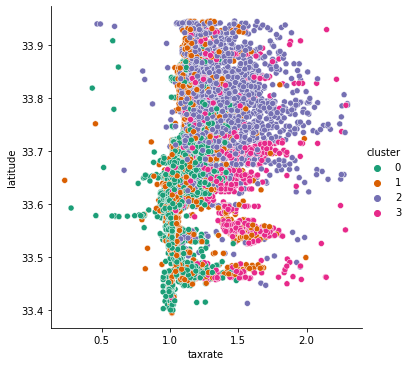

In [82]:
sns.relplot(data=orange_train, x='taxrate', y='latitude', hue='cluster', palette= 'Dark2')

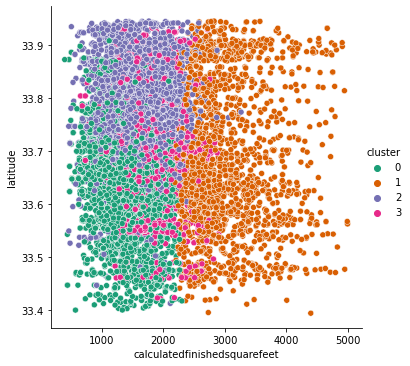

In [83]:
sns.relplot(data=orange_train, x='calculatedfinishedsquarefeet', y='latitude', hue='cluster', palette= 'Dark2')

(-0.3, 0.3)

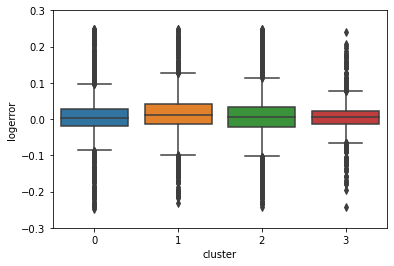

In [84]:
sns.boxplot(y=orange_train.logerror, x=orange_train.cluster)
plt.ylim(-.3, .3)

In [85]:
orange_train.groupby('fips').cluster.value_counts()

fips  cluster
6059  2          3694
      0          3538
      1          2018
      3          1349
Name: cluster, dtype: int64

In [86]:
orange_train.to_csv('orange_model')

## Ventura County

In [87]:
ventura_train = train[train['ventura_county'] == 1]

## make a dataframe that is only Ventura County homes

In [88]:
ventura_train.groupby('ventura_county').ventura_county.value_counts()

ventura_county  ventura_county
1               1                 3091
Name: ventura_county, dtype: int64

In [89]:
ventura_train = ventura_train.drop(columns = 'cluster')

In [90]:
ventura_train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
17054354,1.00,5.00,2.00,4.00,"1,311.00",6111,34.44,-119.30,"9,552.00",0.00,...,0.40,0.00,2.30,0.22,0.30,0.30,0.50,0,0,1
17204313,1.00,5.00,3.00,5.00,"2,729.00",6111,34.27,-118.86,"8,966.00",0.00,...,0.13,0.00,1.17,0.21,0.30,0.60,0.60,0,0,1
17298090,1.00,5.00,3.00,4.00,"3,048.00",6111,34.18,-118.76,"5,638.00",0.00,...,0.27,0.00,1.27,0.13,0.10,0.70,0.75,0,0,1
17203911,1.00,5.00,2.00,2.00,"1,375.00",6111,34.29,-118.87,"7,281.00",0.00,...,0.20,0.00,1.12,0.17,0.20,0.30,1.00,0,0,1
17190003,1.00,5.00,2.50,3.00,"1,261.00",6111,34.14,-119.19,"1,306.00",0.00,...,0.33,0.00,1.15,0.03,0.00,0.30,0.83,0,0,1


In [91]:
ventura_train.shape

(3091, 30)

In [92]:
ventura_train_scaled = train_scaled[train_scaled['ventura_county'] == 1]

In [93]:
ventura_train_scaled.groupby('ventura_county').ventura_county.value_counts()

ventura_county  ventura_county
1.00            1.00              3091
Name: ventura_county, dtype: int64

In [94]:
ventura_train_scaled = ventura_train_scaled.drop(columns = 'cluster')

In [95]:
ventura_train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_of_home,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
0,0.00,0.33,0.11,0.33,0.21,0.80,0.09,0.25,0.00,0.58,...,0.41,0.43,0.41,1.00,0.25,0.75,0.38,0.00,0.00,1.00
6,0.00,0.33,0.22,0.44,0.51,0.67,0.32,0.24,0.00,0.83,...,0.11,0.14,0.29,0.45,0.24,0.75,0.75,0.00,0.00,1.00
28,0.00,0.33,0.22,0.33,0.58,0.61,0.37,0.15,0.00,0.75,...,0.21,0.29,0.26,0.50,0.14,0.25,0.88,0.00,0.00,1.00
50,0.00,0.33,0.11,0.11,0.22,0.69,0.31,0.19,0.00,0.33,...,0.18,0.21,0.39,0.43,0.19,0.50,0.38,0.00,0.00,1.00
58,0.00,0.33,0.17,0.22,0.19,0.58,0.15,0.03,0.00,0.42,...,0.29,0.36,0.53,0.44,0.02,0.00,0.38,0.00,0.00,1.00


In [96]:
ventura_train_scaled.shape

(3091, 24)

### Ventura Model

In [97]:
## Using the same features from our main model, we will make another model exclusive to homes in Ventura County

In [98]:
X = ventura_train_scaled[['latitude', 'calculatedfinishedsquarefeet', 'age_of_home', 'taxrate']]

In [99]:
X.head()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
0,0.80,0.21,0.41,1.00
6,0.67,0.51,0.11,0.45
28,0.61,0.58,0.21,0.50
50,0.69,0.22,0.18,0.43
58,0.58,0.19,0.29,0.44


In [100]:
X.corr()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
latitude,1.00,-0.07,0.15,0.09
calculatedfinishedsquarefeet,-0.07,1.00,-0.38,-0.03
age_of_home,0.15,-0.38,1.00,-0.08
taxrate,0.09,-0.03,-0.08,1.00


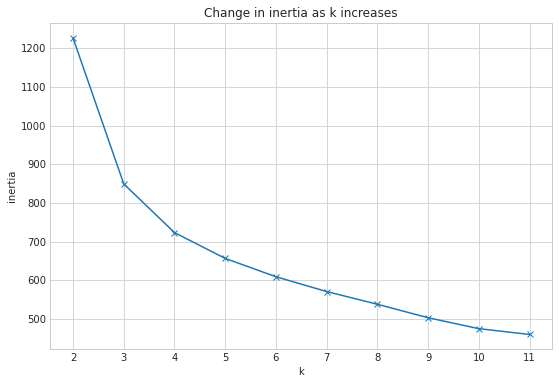

In [101]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(ventura_train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [102]:
## It appears that 4 would be an appropriate value for k

In [103]:
kmeans = KMeans(n_clusters=4)
## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)
## fit the model to the fields you want to use in your model

kmeans.predict(X)
## make your predictions

ventura_train_scaled['cluster'] = kmeans.predict(X)
## store the predictions as a column on your df

ventura_train['cluster'] = kmeans.predict(X)
## store the predictions as a column on your df

In [104]:
ventura_train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county,cluster
0,0.00,0.33,0.11,0.33,0.21,0.80,0.09,0.25,0.00,0.58,...,0.43,0.41,1.00,0.25,0.75,0.38,0.00,0.00,1.00,2
6,0.00,0.33,0.22,0.44,0.51,0.67,0.32,0.24,0.00,0.83,...,0.14,0.29,0.45,0.24,0.75,0.75,0.00,0.00,1.00,0
28,0.00,0.33,0.22,0.33,0.58,0.61,0.37,0.15,0.00,0.75,...,0.29,0.26,0.50,0.14,0.25,0.88,0.00,0.00,1.00,0
50,0.00,0.33,0.11,0.11,0.22,0.69,0.31,0.19,0.00,0.33,...,0.21,0.39,0.43,0.19,0.50,0.38,0.00,0.00,1.00,3
58,0.00,0.33,0.17,0.22,0.19,0.58,0.15,0.03,0.00,0.42,...,0.36,0.53,0.44,0.02,0.00,0.38,0.00,0.00,1.00,2


In [105]:
ventura_train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
17054354,1.00,5.00,2.00,4.00,"1,311.00",6111,34.44,-119.30,"9,552.00",0.00,...,0.00,2.30,0.22,0.30,0.30,0.50,0,0,1,2
17204313,1.00,5.00,3.00,5.00,"2,729.00",6111,34.27,-118.86,"8,966.00",0.00,...,0.00,1.17,0.21,0.30,0.60,0.60,0,0,1,0
17298090,1.00,5.00,3.00,4.00,"3,048.00",6111,34.18,-118.76,"5,638.00",0.00,...,0.00,1.27,0.13,0.10,0.70,0.75,0,0,1,0
17203911,1.00,5.00,2.00,2.00,"1,375.00",6111,34.29,-118.87,"7,281.00",0.00,...,0.00,1.12,0.17,0.20,0.30,1.00,0,0,1,3
17190003,1.00,5.00,2.50,3.00,"1,261.00",6111,34.14,-119.19,"1,306.00",0.00,...,0.00,1.15,0.03,0.00,0.30,0.83,0,0,1,2


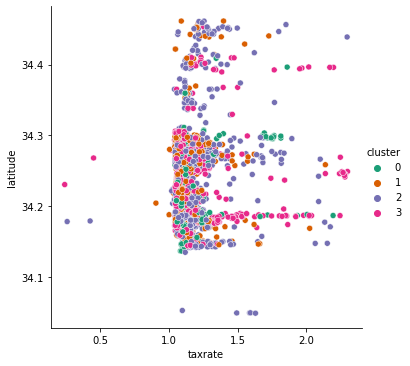

In [106]:
sns.relplot(data=ventura_train, x='taxrate', y='latitude', hue='cluster', palette= 'Dark2')

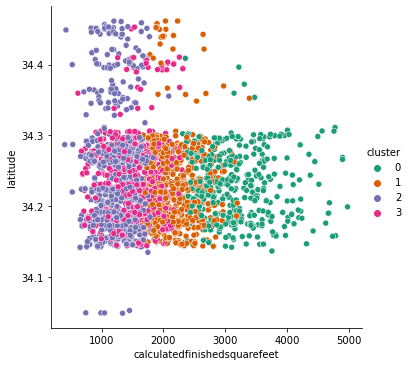

In [107]:
sns.relplot(data=ventura_train, x='calculatedfinishedsquarefeet', y='latitude', hue='cluster', palette= 'Dark2')

(-0.3, 0.3)

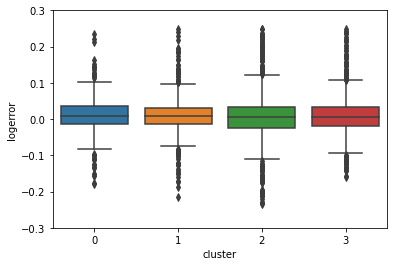

In [108]:
sns.boxplot(y=ventura_train.logerror, x=ventura_train.cluster)
plt.ylim(-.3, .3)

In [109]:
ventura_train.groupby('fips').cluster.value_counts()

fips  cluster
6111  2          1128
      3           889
      1           648
      0           426
Name: cluster, dtype: int64

In [110]:
ventura_train.to_csv('ventura_model')